In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, roc_curve, auc
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

### Plot functions

In [6]:
def plot_confusion_matrix(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a figure and axes
    plt.figure(figsize=(6, 4))
    im = plt.imshow(cm, interpolation='nearest', cmap='Blues', norm=LogNorm(vmin=cm.min(), vmax=cm.max()))
    plt.title('Confusion Matrix')
    plt.colorbar(im, format='%d')  # Display actual values in the color bar
    
    # Add labels to the plot
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    
    # Add values to each cell
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="black" if cm[i, j] < np.max(cm) * 0.5 else "white")
    
    # Add axes labels
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Show the plot
    plt.show()

In [ ]:
def plot_roc_curve(y_true, y_scores):
    # Compute the false positive rate, true positive rate, and threshold values
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    # Compute the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Create the ROC curve plot
    plt.figure()
    plt.plot(fpr, tpr, color='#0072B2', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='#cc3c34', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Load data

In [7]:
df_encoded = pd.read_csv("data/encoded_data.csv", sep="\t")
df = pd.read_csv("data/combined_dataframe_clean.csv", sep="\t")

## Split dataframe

In [8]:
from sklearn.model_selection import train_test_split 
X_train_GP, X_temp_GP, y_train_GP, y_temp_GP = train_test_split(df_encoded, df['GoodPitStop'], test_size=0.3, random_state=4815)
X_val_GP, X_test_GP, y_val_GP, y_test_GP = train_test_split(X_temp_GP, y_temp_GP, test_size=0.5, random_state=4815)
X_train_HP, X_temp_HP, y_train_HP, y_temp_HP = train_test_split(df_encoded, df['HasPitLap'], test_size=0.3, random_state=4815)
X_val_HP, X_test_HP, y_val_HP, y_test_HP = train_test_split(X_temp_HP, y_temp_HP, test_size=0.5, random_state=4815)

# Random forest

### Has pit lap

In [9]:
rf_HasPit = RandomForestClassifier(class_weight="balanced", max_depth= None, min_samples_split=10, n_estimators=100)
rf_HasPit.fit(X_train_HP, y_train_HP)
y_pred_HP = rf_HasPit.predict(X_test_HP)

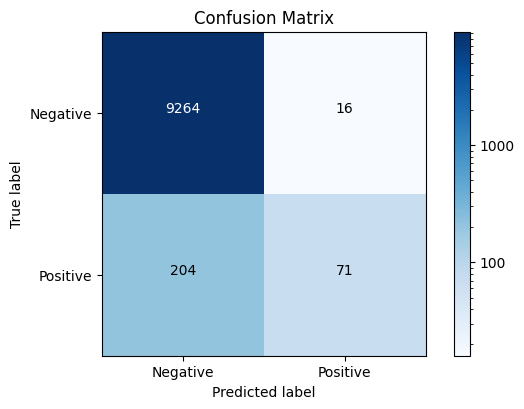

In [44]:
plot_confusion_matrix(y_test_HP, y_pred_HP)


In [10]:
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test_HP,y_pred_HP),3)))
print( "Precision : " + str(np.round(metrics.precision_score(y_test_HP,y_pred_HP),3)))
print( "Recall : " + str(np.round(metrics.recall_score(y_test_HP,y_pred_HP),3)))
print( "F1 : " + str(np.round(metrics.f1_score(y_test_HP,y_pred_HP),3)))

[[9264   16]
 [ 204   71]]
Accuracy : 0.977
Precision : 0.816
Recall : 0.258
F1 : 0.392


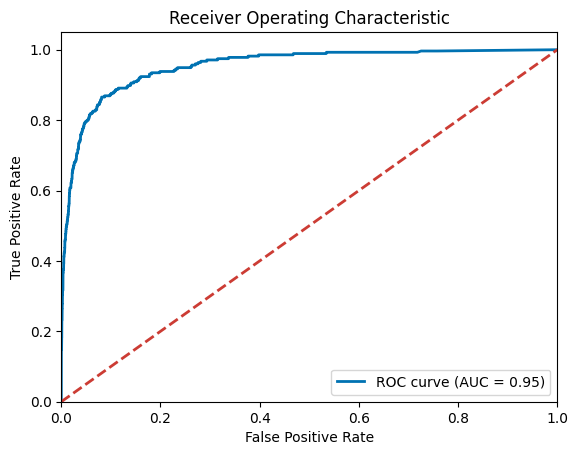

In [52]:
# Get the predicted probabilities for the positive class
y_scores_HP = rf_HasPit.predict_proba(X_test_HP)[:, 1]

# Plot the ROC curve
plot_roc_curve(y_test_HP, y_scores_HP)

### Good pit

In [ ]:
rf_HasPit = RandomForestClassifier(class_weight="balanced", max_depth= None, min_samples_split=10, n_estimators=100)
rf_HasPit.fit(X_train_HP, y_train_HP)
y_pred_HP = rf_HasPit.predict(X_test_HP)

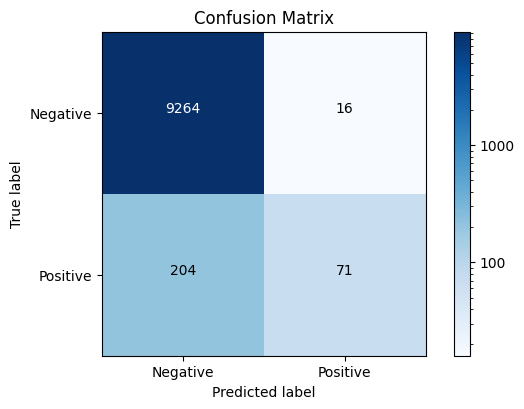

In [ ]:
plot_confusion_matrix(y_test_HP, y_pred_HP)


In [ ]:
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test_HP,y_pred_HP),3)))
print( "Precision : " + str(np.round(metrics.precision_score(y_test_HP,y_pred_HP),3)))
print( "Recall : " + str(np.round(metrics.recall_score(y_test_HP,y_pred_HP),3)))
print( "F1 : " + str(np.round(metrics.f1_score(y_test_HP,y_pred_HP),3)))

[[9264   16]
 [ 204   71]]
Accuracy : 0.977
Precision : 0.816
Recall : 0.258
F1 : 0.392


In [ ]:
# Get the predicted probabilities for the positive class
y_scores_HP = rf_HasPit.predict_proba(X_test_HP)[:, 1]

# Plot the ROC curve
plot_roc_curve(y_test_HP, y_scores_HP)